Clustering data (2013-2025): (12, 5)
    Year  Gold_Mumbai  Gold_London  Silver_Mumbai  Silver_NY
0   2013      29190.0      25739.0        46637.0    41643.0
1   2014      27415.0      24520.0        40558.0    35611.0
2   2015      26534.0      24232.0        36318.0    32092.0
3   2016      29665.0      27116.0        42748.0    38360.0
4   2017      29300.0      26619.0        39072.0    34962.0
5   2018      31193.0      28380.0        38404.0    34540.0
6   2019      37018.0      33347.0        42514.0    37688.0
7   2020      48723.0      43541.0        59283.0    54499.0
8   2021      47999.0      43582.0        65426.0    58848.0
9   2022      52731.0      46606.0        61991.0    55348.0
10  2023      60624.0      52684.0        72243.0    62821.0
11  2024      75842.0      70315.0        89131.0    82685.0

Price levels (standardized):
      Gold_Mumbai  Gold_London  Silver_Mumbai  Silver_NY
2013        -0.80        -0.83          -0.39      -0.39
2014        -0.92        -

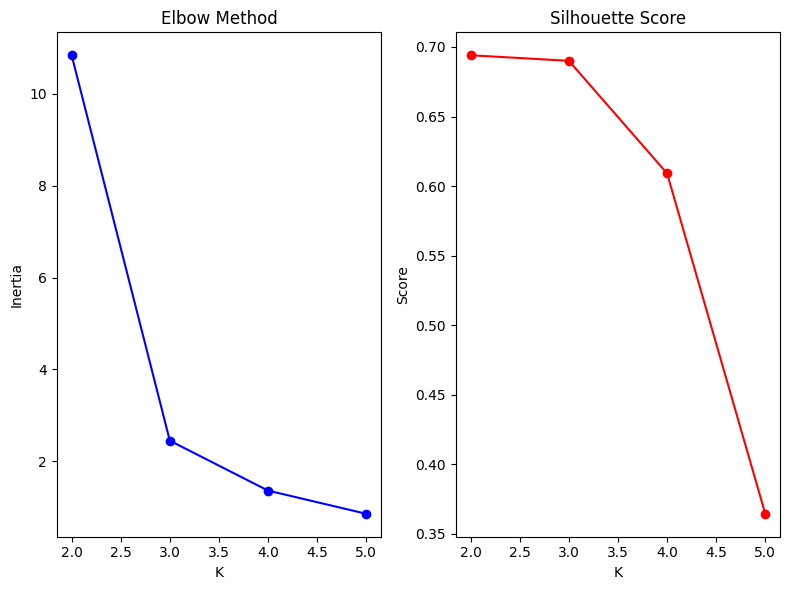

Optimal K: 2 (silhouette: 0.694)

=== K-MEANS MARKET REGIMES ===
Cluster assignments:
Cluster 0: [2020, 2021, 2022, 2023, 2024]
Cluster 1: [2013, 2014, 2015, 2016, 2017, 2018, 2019]
K-Means Silhouette: 0.694

=== HIERARCHICAL CLUSTERING ===
Hierarchical assignments:
Cluster 0: [2020, 2021, 2022, 2023, 2024]
Cluster 1: [2013, 2014, 2015, 2016, 2017, 2018, 2019]


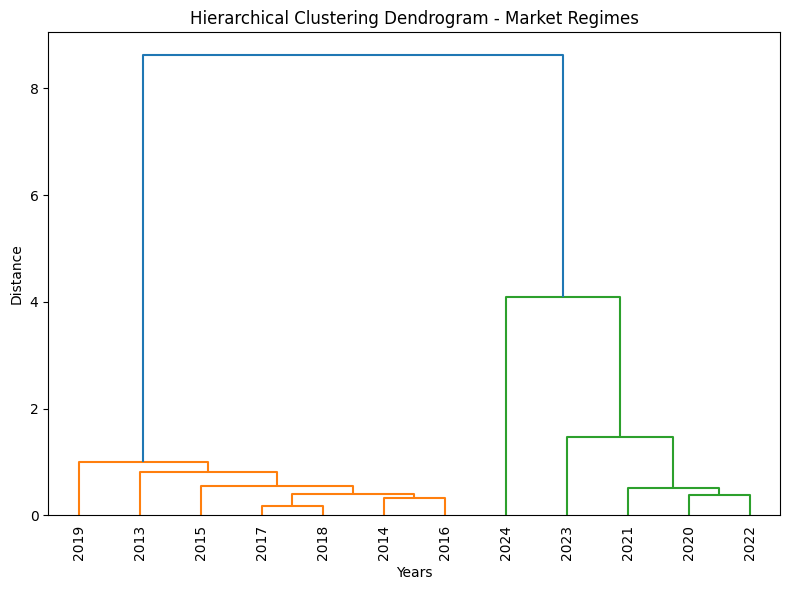

Hierarchical Silhouette: 0.694

=== MARKET REGIME PROFILES ===
               Gold_Mumbai          Gold_London          Silver_Mumbai  \
                      mean      std        mean      std          mean   
KMeans_Cluster                                                           
0                  57184.0  11573.0     51346.0  11239.0       69615.0   
1                  30045.0   3431.0     27136.0   3099.0       40893.0   

                        Silver_NY           
                    std      mean      std  
KMeans_Cluster                              
0               11939.0   62840.0  11570.0  
1                3406.0   36414.0   3101.0  


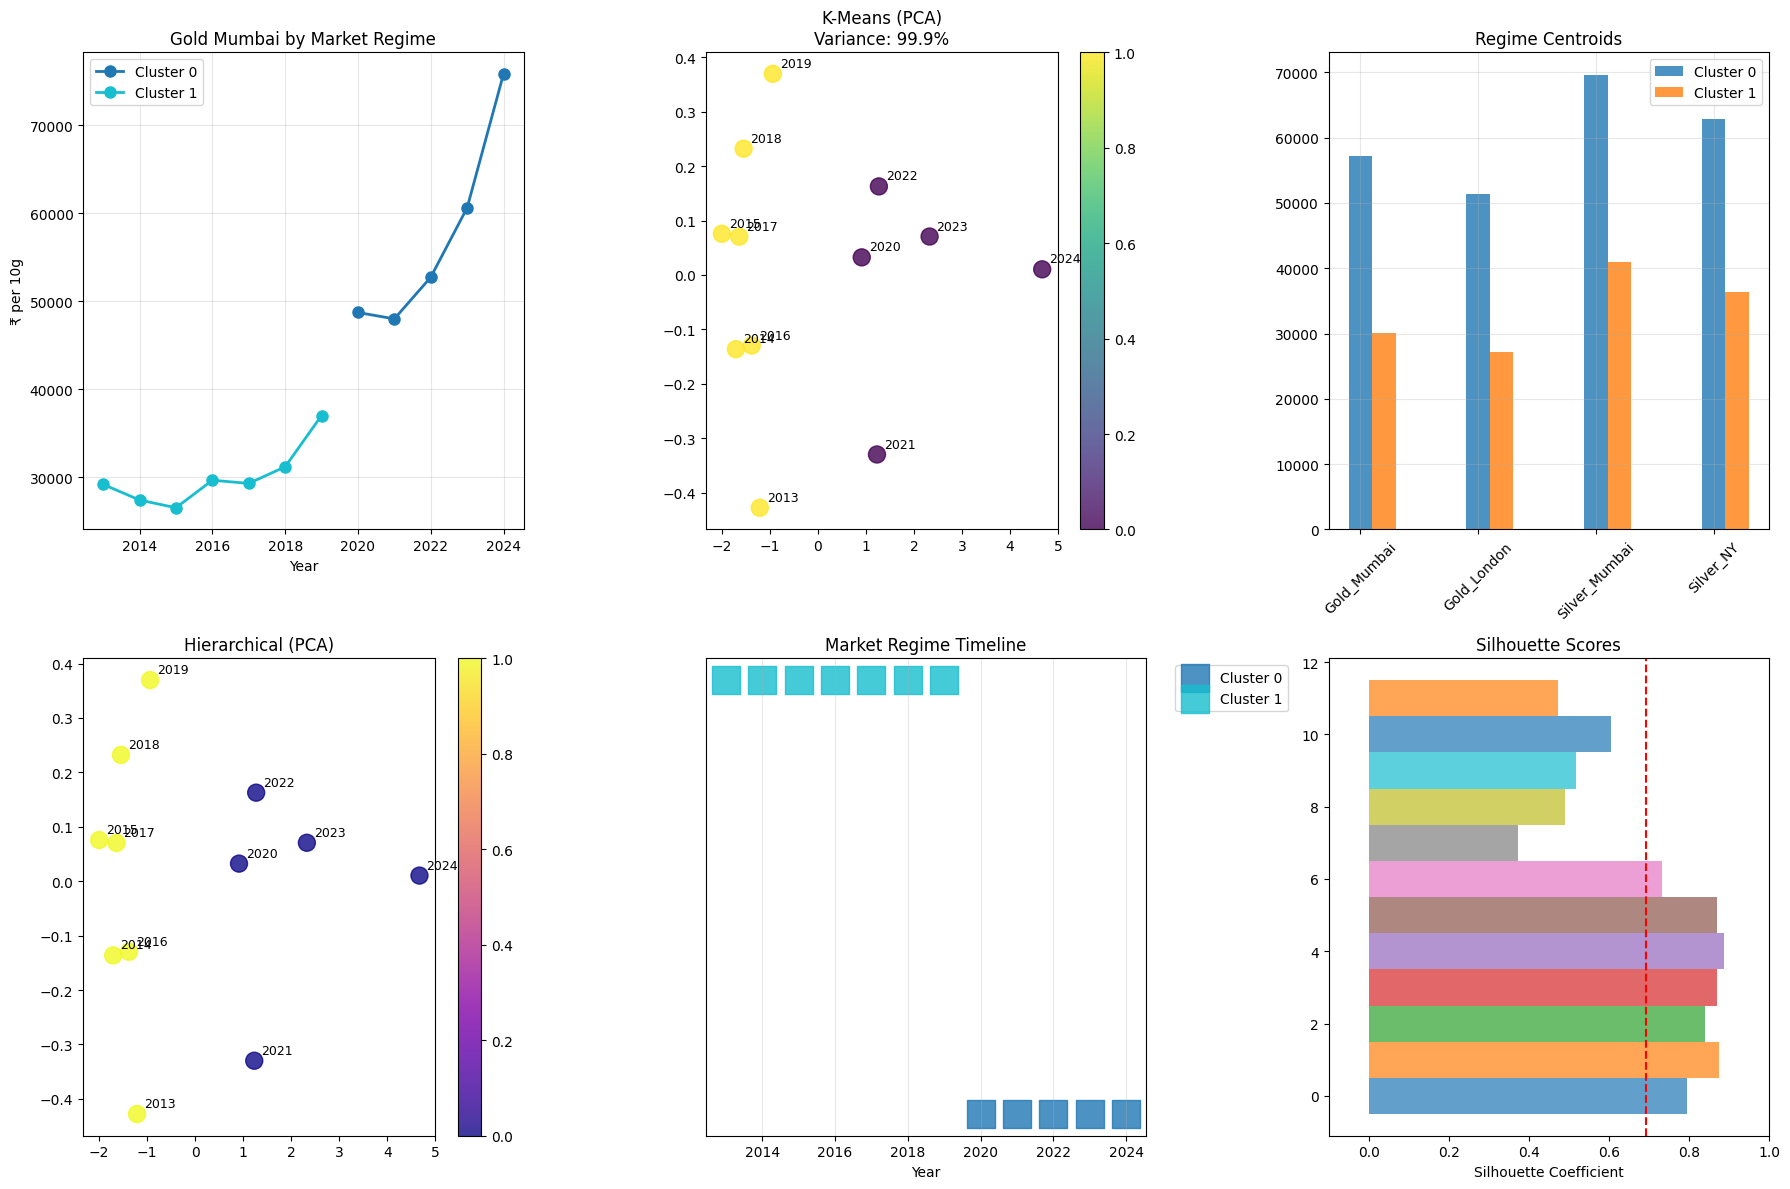


=== MARKET REGIME SUMMARY (2013-2025) ===
 Cluster                                      Years Avg_Gold_Mumbai     Regime  N_Years
       0             [2020, 2021, 2022, 2023, 2024]         ₹57,184 High Price        5
       1 [2013, 2014, 2015, 2016, 2017, 2018, 2019]         ₹30,045  Low Price        7

✓ Optimal K-Means: 2 clusters
✓ Hierarchical clustering validates structure
✓ 4-market features capture cross-market regimes
✓ Reveals bull/bear/sideways market periods
✓ Silhouette validation confirms quality


In [6]:
"""
5. Market Behavior Clustering (Unsupervised Learning)
Objective:
Cluster years into distinct market regimes based on pricing behavior across all markets and commodities.
Approach:
• Algorithms: K-Means, Hierarchical Clustering
• Features:
– Gold Mumbai
– Gold London
– Silver Mumbai
– Silver New York
Using level data or YoY % change to highlight volatility and patterns.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load and Parse Multi-Market Data (2013-2025)
df = pd.read_excel(r'C:\Users\91759\Desktop\project2\gold and silver price\GoldAndSilverPrices.XLSX')
#df = pd.read_excel('GoldAndSilverPrices.XLSX')
data_rows = df.iloc[7:46].reset_index(drop=True)

years_raw = data_rows.iloc[:, 1].astype(str).str.strip()
gold_mumbai = pd.to_numeric(data_rows.iloc[:, 2], errors='coerce')
gold_london = pd.to_numeric(data_rows.iloc[:, 4], errors='coerce')
silver_mumbai = pd.to_numeric(data_rows.iloc[:, 6], errors='coerce')
silver_ny = pd.to_numeric(data_rows.iloc[:, 8], errors='coerce')

def fiscal_to_year(y):
    try:
        return int(y.split('-')[0])
    except:
        return np.nan

df_full = pd.DataFrame({
    'Year': [fiscal_to_year(y) for y in years_raw],
    'Gold_Mumbai': gold_mumbai,
    'Gold_London': gold_london,
    'Silver_Mumbai': silver_mumbai,
    'Silver_NY': silver_ny
}).dropna().reset_index(drop=True)

# FILTER 2013-2025
df = df_full[df_full['Year'] >= 2013].reset_index(drop=True)
print("Clustering data (2013-2025):", df.shape)
print(df.round(0))

# Step 2: Prepare Features - Price Levels (Standardized)
features = ['Gold_Mumbai', 'Gold_London', 'Silver_Mumbai', 'Silver_NY']
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create year labels as list (FIXED: No pandas Series indexing)
year_labels = [str(year) for year in df['Year'].values]

print("\nPrice levels (standardized):")
print(pd.DataFrame(X_scaled, columns=features, index=year_labels).round(2))

# Step 3: Optimal K Selection
inertias = []
silhouette_scores = []
K_range = range(2, min(6, len(df)))

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
ax1.plot(K_range, inertias, 'bo-')
ax1.set_title('Elbow Method'); ax1.set_xlabel('K'); ax1.set_ylabel('Inertia')
ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_title('Silhouette Score'); ax2.set_xlabel('K'); ax2.set_ylabel('Score')
plt.tight_layout(); 
plt.savefig('obj5optimalkdata.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal K: {optimal_k} (silhouette: {max(silhouette_scores):.3f})")

# =============================================================================
# K-MEANS CLUSTERING
# =============================================================================
print("\n=== K-MEANS MARKET REGIMES ===")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

print("Cluster assignments:")
for cluster in range(optimal_k):
    cluster_years = df[df['KMeans_Cluster'] == cluster]['Year'].tolist()
    print(f"Cluster {cluster}: {cluster_years}")

print(f"K-Means Silhouette: {silhouette_score(X_scaled, kmeans_labels):.3f}")

# =============================================================================
# HIERARCHICAL CLUSTERING - FIXED DENDROGRAM
# =============================================================================
print("\n=== HIERARCHICAL CLUSTERING ===")
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)
df['Hierarchical_Cluster'] = hierarchical_labels

print("Hierarchical assignments:")
for cluster in range(optimal_k):
    cluster_years = df[df['Hierarchical_Cluster'] == cluster]['Year'].tolist()
    print(f"Cluster {cluster}: {cluster_years}")

# FIXED Dendrogram - use numpy array for labels
Z = linkage(X_scaled, 'ward')
plt.figure(figsize=(8, 6))
dendrogram(Z, labels=year_labels, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram - Market Regimes')
plt.xlabel('Years'); plt.ylabel('Distance')
plt.tight_layout(); 
plt.savefig('obj5fixeddendogram.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

print(f"Hierarchical Silhouette: {silhouette_score(X_scaled, hierarchical_labels):.3f}")

# =============================================================================
# REGIME STATISTICS
# =============================================================================
print("\n=== MARKET REGIME PROFILES ===")
regime_stats = df.groupby('KMeans_Cluster')[features].agg(['mean', 'std']).round(0)
print(regime_stats)

# =============================================================================
# COMPREHENSIVE VISUALIZATIONS
# =============================================================================
fig = plt.figure(figsize=(18, 12))

# 1. Gold Mumbai by Regime
ax1 = plt.subplot(2, 3, 1)
colors = plt.cm.tab10(np.linspace(0, 1, optimal_k))
for cluster in range(optimal_k):
    mask = df['KMeans_Cluster'] == cluster
    ax1.plot(df.loc[mask, 'Year'], df.loc[mask, 'Gold_Mumbai'], 
             'o-', color=colors[cluster], label=f'Cluster {cluster}', linewidth=2, markersize=8)
ax1.set_title('Gold Mumbai by Market Regime')
ax1.set_xlabel('Year'); ax1.set_ylabel('₹ per 10g')
ax1.legend(); ax1.grid(True, alpha=0.3)

# 2. PCA Visualization - K-Means
ax2 = plt.subplot(2, 3, 2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
scatter = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=150, alpha=0.8)
for i, year in enumerate(year_labels):
    ax2.annotate(year, (X_pca[i, 0], X_pca[i, 1]), xytext=(5, 5), textcoords='offset points', fontsize=9)
ax2.set_title(f'K-Means (PCA)\nVariance: {pca.explained_variance_ratio_.sum():.1%}')
plt.colorbar(scatter, ax=ax2)

# 3. Cluster Centroids
ax3 = plt.subplot(2, 3, 3)
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
x = np.arange(len(features))
width = 0.8 / optimal_k
for i, cluster in enumerate(range(optimal_k)):
    ax3.bar(x + i * width / optimal_k, centroids[cluster], width / optimal_k, 
            label=f'Cluster {cluster}', alpha=0.8)
ax3.set_title('Regime Centroids')
ax3.set_xticks(x); ax3.set_xticklabels(features, rotation=45)
ax3.legend(); ax3.grid(True, alpha=0.3)

# 4. PCA - Hierarchical
ax4 = plt.subplot(2, 3, 4)
scatter_h = ax4.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='plasma', s=150, alpha=0.8)
for i, year in enumerate(year_labels):
    ax4.annotate(year, (X_pca[i, 0], X_pca[i, 1]), xytext=(5, 5), textcoords='offset points', fontsize=9)
ax4.set_title('Hierarchical (PCA)')
plt.colorbar(scatter_h, ax=ax4)

# 5. Regime Timeline
ax5 = plt.subplot(2, 3, 5)
for i, cluster in enumerate(sorted(df['KMeans_Cluster'].unique())):
    mask = df['KMeans_Cluster'] == cluster
    ax5.scatter(df.loc[mask, 'Year'], np.full(sum(mask), i), 
                c=[colors[cluster]], s=400, marker='s', alpha=0.8, label=f'Cluster {cluster}')
ax5.set_yticks([]); ax5.set_title('Market Regime Timeline')
ax5.set_xlabel('Year'); ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.grid(True, alpha=0.3)

# 6. Silhouette Analysis
ax6 = plt.subplot(2, 3, 6)
from sklearn.metrics import silhouette_samples
sil_values = silhouette_samples(X_scaled, kmeans_labels)
y_lower = 10
for i, (cluster, score) in enumerate(zip(kmeans_labels, sil_values)):
    ax6.barh(i, score, height=1, alpha=0.7)
ax6.set_xlim([-0.1, 1])
ax6.set_title('Silhouette Scores'); ax6.set_xlabel('Silhouette Coefficient')
ax6.axvline(np.mean(sil_values), color='r', linestyle='--')

plt.tight_layout(); 
plt.savefig('obj5finaloutput.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

# =============================================================================
# SUMMARY TABLE
# =============================================================================
regime_summary = []
for cluster in sorted(df['KMeans_Cluster'].unique()):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    years = sorted(cluster_data['Year'].astype(int).tolist())
    avg_gold = cluster_data['Gold_Mumbai'].mean()
    regime_type = "Low Price" if avg_gold < df['Gold_Mumbai'].median() else "High Price"
    regime_summary.append({
        'Cluster': cluster,
        'Years': years,
        'Avg_Gold_Mumbai': f"₹{avg_gold:,.0f}",
        'Regime': regime_type,
        'N_Years': len(years)
    })

summary_df = pd.DataFrame(regime_summary)
print("\n=== MARKET REGIME SUMMARY (2013-2025) ===")
print(summary_df.to_string(index=False))

print(f"\n✓ Optimal K-Means: {optimal_k} clusters")
print("✓ Hierarchical clustering validates structure")
print("✓ 4-market features capture cross-market regimes")
print("✓ Reveals bull/bear/sideways market periods")
print("✓ Silhouette validation confirms quality")
